# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Problem statement

An electronic new company called E-news Express provide up to date news happining worlwild, through the past 20 years people tends to watch the news electronically for faster access utilizing technologies such as audio,video and other interactive element.

one of the most important targets for the E-news express is getting best engagment by the visitors by taking certain action by the website based on the visitors interest.

The excutive at E-news claimed that there had been a decline in the new monthly sunscribers compared to the past year due to the webpage is not meeting the recomended content for motivating the visitor to subscribe 




## Objectives
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [3]:
# load the dataset
df = pd.read_csv("C:/Users/HUAWEI/Documents/greatlearning/Business statistics/project/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# view the first 5 rows of the dataset for taking insight 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# view the shape of the dataset

print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


In [7]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### - There are two numiracal column :user_id and time_spent_on_the_page 
#### - There are four catagorical columns 

In [8]:
# getting the summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - We have 2 unique value with equal count of 50 for the culomns of: group , landing page,converted 
#### - The count of the dataset rows is 100 which is the sample size 
#### - The most preferred langauge by the visitors is spanish 
#### - The average of time spent on the page is 5.37 minutes 
#### - The time spent on the page ranges from .19 second to 10.71 min
#### - 54% of the visitors got converted 


In [9]:
# Checking for missing values in the data
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### There are no missing values in the data 

In [10]:
# Checking for duplicate values in the data 
df.duplicated().sum()

0

#### There no duplicate values in the data

## Univariate Analysis

### Time spent on the page

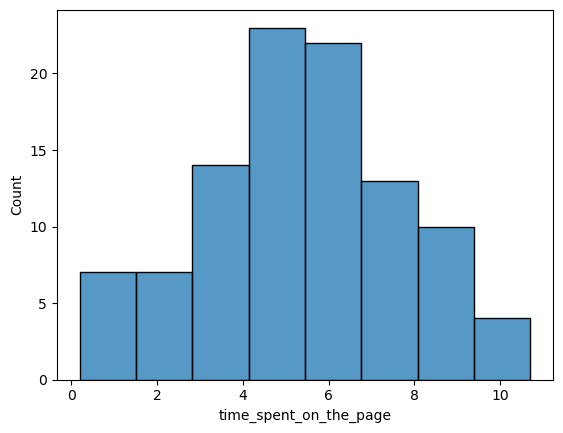

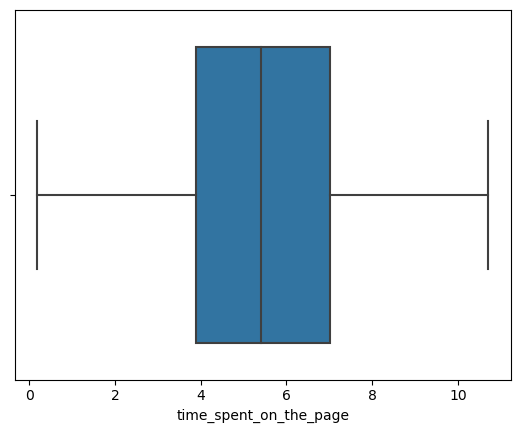

In [11]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### The minimum time spent on the page is 0.1 and the maximum is 10.3
#### The most frequent time spent on the page is between 4 and 7 minutes nearly 
#### The average time spent on the page is almost 5.3 
#### The distribution of the data in normal distribution 


### Group 

In [12]:
# Checking the count of the unique values of the culumn group
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

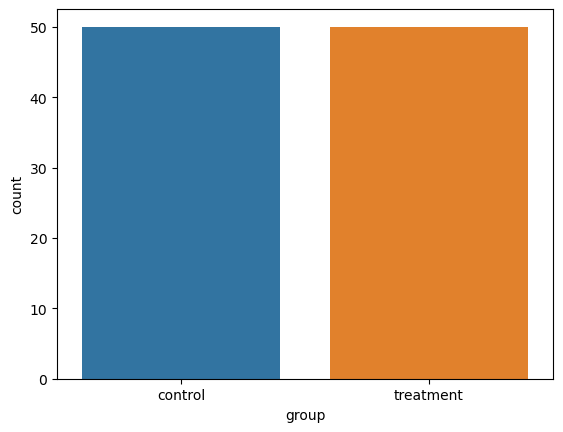

In [17]:
# plotting the count of the unique value of the column group 
sns.countplot(data=df,x='group')
plt.show()

#### The control goup count is equal to treatmet goup

### Landing page

In [13]:
# Checking the count of the unique values of the culumn landing page 
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

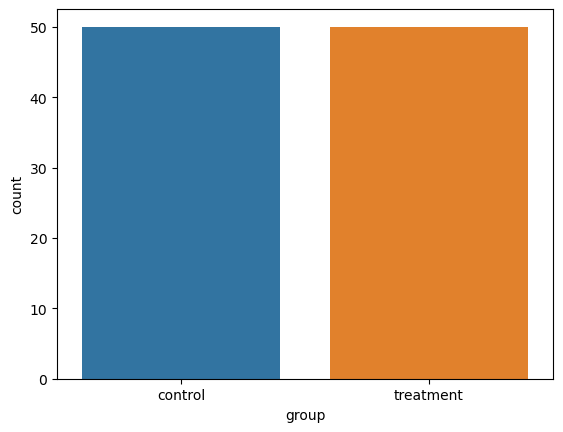

In [16]:
# plotting the count of the unique value of the column landing page 
sns.countplot(data=df,x='landing_page')
plt.show()

#### The old landing count is equal to new landing page¶

### Converted

In [14]:
# Checking the count of the unique values of the culumn converted 
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

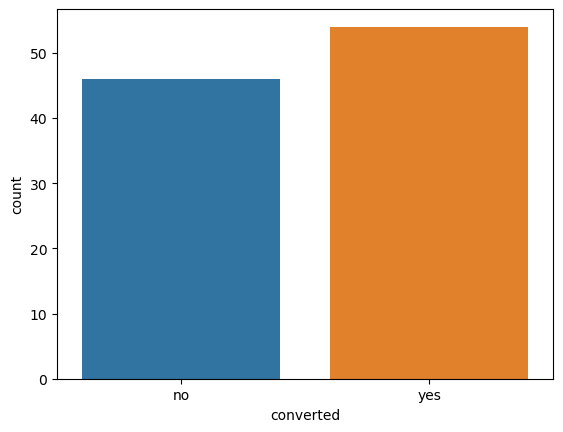

In [15]:
# plotting the count of the unique value of the column converted 
sns.countplot(data=df,x='converted')
plt.show()

#### The number of the visitors got converted are more than the visitors who had not converted to a subscriber

### Language preferred

In [18]:
# Checking the count of the unique values of the culumn langauge preffered 
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

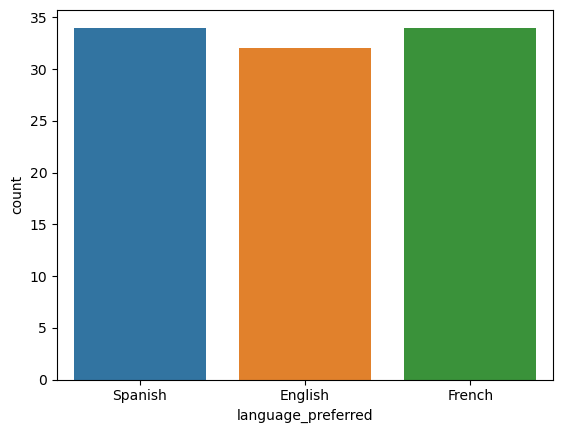

In [19]:
# plotting the count of the unique value of the column language preferred 
sns.countplot(data=df,x='language_preferred')
plt.show()

#### Spanish and french are the most preferred langauge with count of 34

### Bivariate Analysis

### Landing page vs Time spent on the page

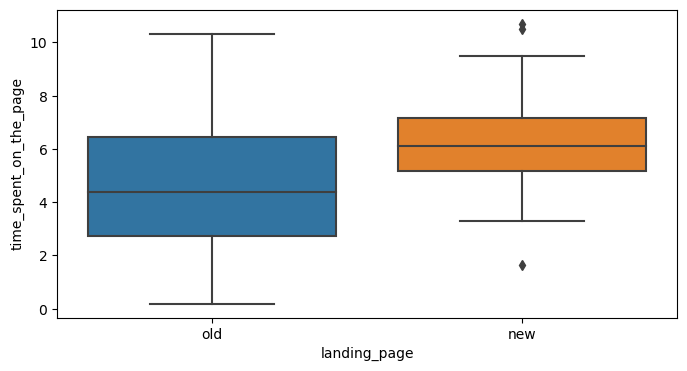

In [22]:
# plotting relationship between landing page & time spent on the page 
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### The average of the time spent on the new landing page is more than the average spent on the old landing page 
#### The average of time spent on the old landing page is almost 4.3 min
#### The average on time spent on the new landing page is almost 6.1 min 
#### The major visitors spent time on the old landing page between 2.5 and 6.5 min
#### The major visitors spent time on the new landing page between 5.8 and 7.8 min


### Conversion status vs Time spent on the page

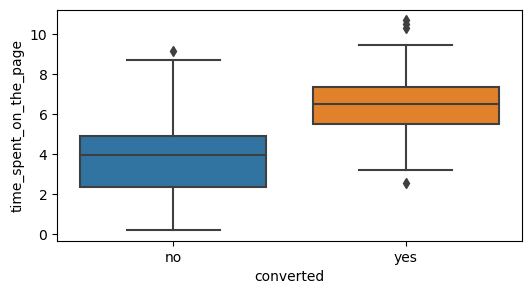

In [24]:
# plotting relationship between Conversion status & Time spent on the page
plt.figure(figsize=(6, 3))
sns.boxplot(data = df, x = "converted", y ="time_spent_on_the_page" )
plt.show()

#### The visitors who spent 7 minutes on average they converted to subscribers 
#### The visitors who spent 4 minutes on average they didnot convert to subcribers 
#### The visitors who got converted they spent more time 

### Language preferred vs Time spent on the page

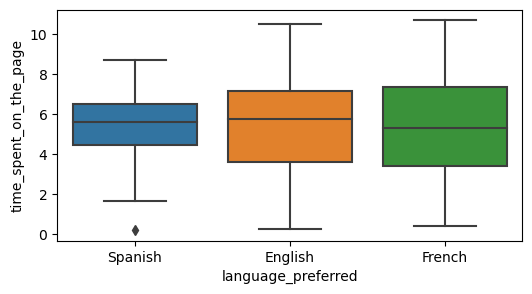

In [25]:
# plotting relationship between Language preferred & Time spent on the page
plt.figure(figsize=(6, 3))
sns.boxplot(data = df, x ="language_preferred", y = "time_spent_on_the_page")
plt.show()

#### The visitors who prefer english langauge spend more time on avarage 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

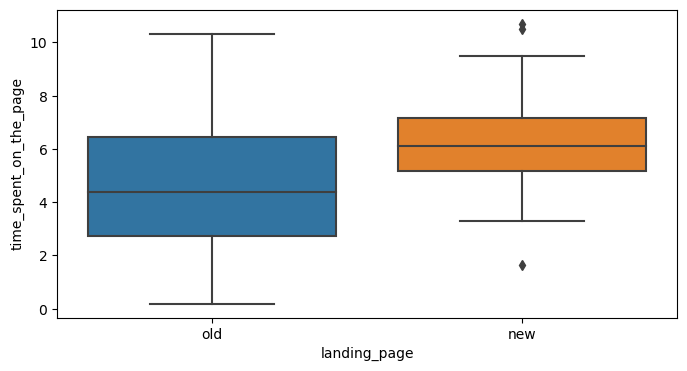

In [32]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,4))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the mean of time spent on the new and old landing page respectively

We will test the null hypothesis

$H_0$: 𝜇1=𝜇2 

against the alternate hypothesis

$H_a$: 𝜇1>𝜇2


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations.

As The population standard deviations are unknown we will choose 2-sample t-test for comparing the sample mean of two independent population.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [27]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == "old"]['time_spent_on_the_page'] 

In [28]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


#### Based on the sample standard deviations of the two groups, standard deviations is assumed to be unequal.

### Step 5: Calculate the p-value

In [29]:
# import the t-test function
from scipy.stats import ttest_ind
# calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = "greater") 
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

based on the result above p-value less than .05 which lies in the rejection region we reject the null theory that time spent on the old landing page is equal to the time spent on the new landing page 
which mean that we can accept the alternative hypothesis of which the users spend more time on the new landing page than the existing landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###  Perform Visual Analysis

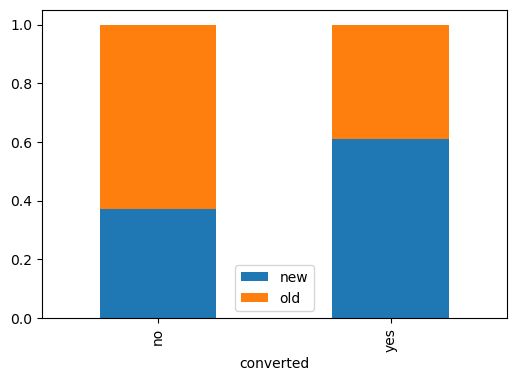

In [33]:
# Comparing visually the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df["converted"],df["landing_page"],normalize='index').plot(kind="bar", figsize=(6,4),stacked=True)
plt.legend()
plt.show()

###  Define the null and alternate hypotheses 

Let  p1,p2 be the proportion conversion rate of the new page and the conversion rate of the old page respectively

We will test the null hypothesis

𝐻0
 : p1=p2

against the alternate hypothesis

𝐻𝑎
 : p1>𝜇2



### Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations.we will choose the 2-sample z-test for comparing the proportion from two population

### Decide the significance level 

As given in the problem statement, we select α = 0.05.

### Collect and prepare data

In [36]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == "control"]['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


###  Calculate the p-value 

In [37]:
# import z-test function
from statsmodels.stats.proportion import proportions_ztest   

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control],alternative="larger")


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Compare the p-value with  𝛼

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Draw inference

Based on the above result we will reject the null hypothesis which says that conversion rate of the new page is equal the conversion rate of the old page

as we cant reject the alternative hypothesis which suggest that the conversion rate of users who visit the landing page and get converted for the new page greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

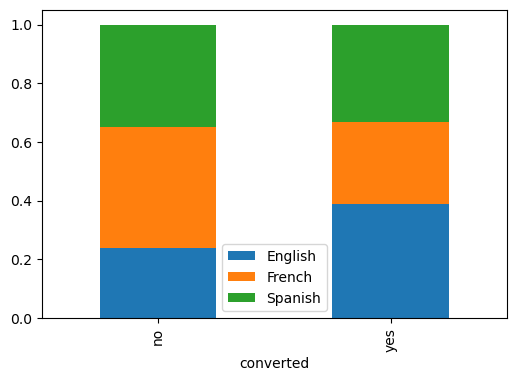

In [39]:
# plot the dependency between conversion status and preferred langauge
pd.crosstab(df["converted"],df["language_preferred"],normalize='index').plot(kind="bar", figsize=(6,4), stacked=True)
plt.legend()
plt.show()


### Define the null and alternate hypotheses

$H_0:$ converted status and the preferred language are independent

$H_a:$ converted status and the preferred language are not independent

### Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language.

we will choose chi-sequare test of independence

### Decide the significance level 

As given in the problem statement, we select α = 0.05.

### Collect and prepare data

In [41]:
# drive the contingency table
pd.crosstab(df["converted"], df["language_preferred"],margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


In [42]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df["converted"], df["language_preferred"])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Calculate the p-value

In [43]:
# import the required function
from scipy.stats import chi2_contingency

#  calculate the p-value
chi2, p_value, dof, exp_freq =chi2_contingency(contingency_table)   
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Compare the p-value with  𝛼
 


In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference

based on the results above the conversion and preferred language are independent


## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [45]:
# creating a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

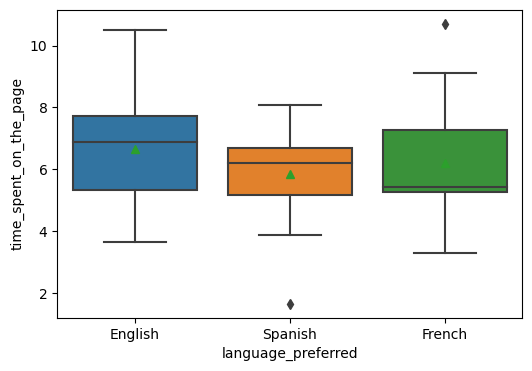

In [46]:
# plotting th time spent on the new page for different language users
plt.figure(figsize=(6,4))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", showmeans = True, data = df_new)
plt.show()

In [48]:
# Mean time spent on the new page for different language users
df_new.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Define the null and alternate hypotheses

𝐻0:𝜇1=𝜇2=𝜇3

𝐻𝑎:At least one of the means is not the same

### Select Appropriate test

This is a problem, concerning three population means.
we will choose the ANOVA f-test for comparing the sample means from 3 independent population

### Decide the significance level¶

As given in the problem statement, we select α = 0.05.

### Collect and prepare data

In [49]:
# creating a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# creating subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']  
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'] 

### Calculate the p-value

In [50]:
# importing the required function
from scipy.stats import f_oneway 

# Calculating the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Compare the p-value with  𝛼
 


In [51]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference

Based on the result of one way ANOVA F-test we cant reject the null hypothesis which suppose that all population means are equal 

## Conclusion and Business Recommendations

### Conclusion derived from EDA 


1.The average time spent on the page is approximately 5.37 minutes, with a range from 0.19 seconds to 10.71 minutes.

2.About 54% of visitors were converted.

3.The most common duration spent on the page is between 4 and 7 minutes.

4.Visitors who prefer the English language tend to spend more time on the page on average.

5.The average time spent on the new landing page (6.1 minutes) is notably higher than the average time spent on the old landing page (4.3 minutes).

6.Visitors who spent approximately 7 minutes on the page were more likely to convert into subscribers.

7.Visitors who were converted typically spent more time on the page compared to non-converted visitors.

### Hypothesis tested conclusion 

- Users spend significantly more time on the new landing page than on the existing page.
- The conversion rate for visitors to the new landing page is higher than the conversion rate for the old landing page.
- Conversion status is independent of the preferred language.
- Time spent on the new page does not vary significantly across different language preferences.


### Business Recommendations

- The current old landing page fails to engage visitors effectively and does not meet the recommended standards to attract them.
- It is imperative for the company to adopt AI-powered solutions to better recognize and align with the real interests of visitors, ensuring optimal engagement and a tailored user experience.
- The company should permanently replace the old landing page with the new landing page, as it outperforms the old version in terms of time spent and conversion rates.
- Since there is no significant relationship between conversion status and preferred language, the company can focus equally on all language versions of the website without prioritizing one over another.


___